# Combining DataFrames

Data in two or more DataFrames can be combined in variety of ways. These ways are 
1. Concatanation
2. Merging/ Joining

## Concatanation

In this operation rows/ columns of another DataFrame are added in the given DataFrame. This operation is also called stacking. 

Pandas provides a `concat` function to perform this operation.


In [88]:
import numpy as np
a = np.eye(3)
a.dtype
b = np.linspace(0,1,11)
c = np
import matplotlib.pyplot as plt
plt.plot(b, '-rs')

dtype('float64')

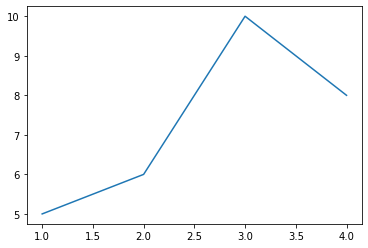

In [104]:
x = np.array([1,2,3,4])
y = np.array([5,6,10,8])
plt.plot(x,y)

In [102]:
np.ones((2,2),'int32').dtype

dtype('int32')

In [86]:
import pandas as pd
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                    index=[0, 1, 2, 3]) 

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                    index=[4, 5, 6, 7]) 

In [87]:
type(df1['A'])

pandas.core.series.Series

In [3]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [5]:
pd.concat([df1, df2])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


The information about the source Datasets can be retained by supplying `keys` arguments

In [6]:
#pd.concat([df1, df2], keys = ['A', 'B'])
#pd.concat({'DF1':df1, 'DF2':df2})
df3 = pd.DataFrame({'A': ['A8', 'A9'],
                    'B': ['B8', 'B9'],
                    'C': ['C8', 'C9'],
                    'D': ['D8', 'D9']},
                    index=[8, 9])
dfDict = {'DF1':df1, 'DF2':df2, 'DF3': df3}
#pd.concat(dfDict)
pd.concat(dfDict, keys = ['DF1', 'DF3'])

A   B   C   D
DF1 0  A0  B0  C0  D0
    1  A1  B1  C1  D1
    2  A2  B2  C2  D2
    3  A3  B3  C3  D3
DF3 8  A8  B8  C8  D8
    9  A9  B9  C9  D9

Same result as above can be obtrained by supplying a dictionary of DataFrames. The keys of dictionary will be used as the keys. However, if the keys arguments is supplied explicitly, only the specified keys will be retained in the result.

Cancatanation can also be performed along columns. To see that first we create df3.

In [8]:
df1, df4

(    A   B   C   D
 0  A0  B0  C0  D0
 1  A1  B1  C1  D1
 2  A2  B2  C2  D2
 3  A3  B3  C3  D3,
      A   E
 0  A10  B0
 1  A11  B1
 3  A12  B2
 4  A13  B3)

In [11]:
df4 = pd.DataFrame({'A': ['A10', 'A11', 'A12', 'A13'],
                    'E': ['B0', 'B1', 'B2', 'B3']},
                     index=[0, 1, 3, 4]) 
pd.concat([df1, df4], axis = 1)

,A,B,C,D,A,E
0,A0,B0,C0,D0,A10,B0
1,A1,B1,C1,D1,A11,B1
2,A2,B2,C2,D2,NaN,NaN
3,A3,B3,C3,D3,A12,B2
4,NaN,NaN,NaN,NaN,A13,B3


In [14]:
df5, df1

(    A   C   E
 8  A8  C8  D8
 9  A9  C9  D9,
     A   B   C   D
 0  A0  B0  C0  D0
 1  A1  B1  C1  D1
 2  A2  B2  C2  D2
 3  A3  B3  C3  D3)

In [15]:
df5 = pd.DataFrame({'A': ['A8', 'A9'],
                    'C': ['C8', 'C9'],
                    'E': ['D8', 'D9']},
                    index=[8, 9])
pd.concat([df1, df5])

,A,B,C,D,E
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
8,A8,NaN,C8,NaN,D8
9,A9,NaN,C9,NaN,D9


In [16]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [17]:
df4

,A,E
0,A10,B0
1,A11,B1
3,A12,B2
4,A13,B3


Note that the union of index has been performed while concatanating the columns.

To perform intersection, we supply the `join` arguments as 

In [19]:
df1, df4

(    A   B   C   D
 0  A0  B0  C0  D0
 1  A1  B1  C1  D1
 2  A2  B2  C2  D2
 3  A3  B3  C3  D3,
      A   E
 0  A10  B0
 1  A11  B1
 3  A12  B2
 4  A13  B3)

In [20]:
pd.concat([df1, df4], 1, join = 'inner')

,A,B,C,D,A,E
0,A0,B0,C0,D0,A10,B0
1,A1,B1,C1,D1,A11,B1
3,A3,B3,C3,D3,A12,B2


In [21]:
pd.concat([df1, df4], axis = 1).reindex(df1.index)

,A,B,C,D,A,E
0,A0,B0,C0,D0,A10,B0
1,A1,B1,C1,D1,A11,B1
2,A2,B2,C2,D2,NaN,NaN
3,A3,B3,C3,D3,A12,B2


When Series is involved in concatanation, the Series will be transformed to DataFrame with the column name as the name of the Series.

In [22]:
df6 = pd.DataFrame({'a':[1, 2, 3, 4], 'b': [.1, .2, .3, .4]})
x = pd.Series([11, 22, 33, 44], name = 'X')
pd.concat([df6, x], axis=1)

,a,b,X
0,1,0.1,11
1,2,0.2,22
2,3,0.3,33
3,4,0.4,44


## Merging DataFrames (joins)

Pandas provides a `merge` function/ method to carry out database style join operations.

In [23]:
df5 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A4'],
                    'E': ['E0', 'E1', 'E2', 'E4']},
                    index=[0, 1, 2, 4]) 
df5

,A,E
0,A0,E0
1,A1,E1
2,A2,E2
4,A4,E4


In [24]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


### Inner join
The merge operation performed below is analogous to 

SQL: `select * from df1 natural join df5`

This operation performs merge (join) with all common columns in the two DataFrames as the composite join key.

In [15]:
df1.merge(df5, how = 'inner')

,A,B,C,D,E
0,A0,B0,C0,D0,E0
1,A1,B1,C1,D1,E1
2,A2,B2,C2,D2,E2


If instead of using all common columns as the join key, we can explicitly specify the join key. This join is analogous to 

SQL: `select * from df1 join df5 using (A)`

In [27]:
df1,df6

(    A   B   C   D
 0  A0  B0  C0  D0
 1  A1  B1  C1  D1
 2  A2  B2  C2  D2
 3  A3  B3  C3  D3,
     A   B
 0  A0  B0
 1  A1  B1
 2  A2  B4
 4  A4  B5)

In [28]:
df6 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A4'],
                    'B': ['B0', 'B1', 'B4', 'B5']},
                    index=[0, 1, 2, 4])
df1.merge(df6, on = 'A')

,A,B_x,C,D,B_y
0,A0,B0,C0,D0,B0
1,A1,B1,C1,D1,B1
2,A2,B2,C2,D2,B4


Observe that the B columns that was present in both the DataFrames has been distinguished in the result.

The nonkey common columns can be distinguished using specified suffixes as shown below.

In [29]:
df1.merge(df6, on = 'A', suffixes = [1, 6])

,A,B1,C,D,B6
0,A0,B0,C0,D0,B0
1,A1,B1,C1,D1,B1
2,A2,B2,C2,D2,B4


Now suppose the two DataFrames do not have any common columns, the join keys can be specified using arguments `left_on` and `right_on`

SQL: `select * from df1 join df7 on (A = E)`

In [30]:
df7 = pd.DataFrame({'E': ['A0', 'A1', 'A2', 'A4'],
                    'F': ['F0', 'F1', 'F2', 'F4']},
                    index=[0, 1, 2, 4])

df1.merge(df7, left_on = 'A', right_on = 'E')

,A,B,C,D,E,F
0,A0,B0,C0,D0,A0,F0
1,A1,B1,C1,D1,A1,F1
2,A2,B2,C2,D2,A2,F2


In [31]:
df1, df7

(    A   B   C   D
 0  A0  B0  C0  D0
 1  A1  B1  C1  D1
 2  A2  B2  C2  D2
 3  A3  B3  C3  D3,
     E   F
 0  A0  F0
 1  A1  F1
 2  A2  F2
 4  A4  F4)

Note that by default, `merge` function performs inner join. It should also be noted that `merge` is designed to perform only equi-joins. **`merge` cannot perform general "theta join"**.

### Outer Join

To perform outer join, we need to supply the `how` argument. The possible values of `how` arguments are: `inner` (default), `left`, `right`, and `outer`. 

#### Left Join
The merge performed below is analogous to the following SQL join.

SQL: `select * from df1 natural left join df5`

In [34]:

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                    index=[4, 5, 6, 7]) 

In [35]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [38]:
df5.merge(df2, how = 'left')

,A,E,B,C,D
0,A0,E0,NaN,NaN,NaN
1,A1,E1,NaN,NaN,NaN
2,A2,E2,NaN,NaN,NaN
3,A4,E4,B4,C4,D4


In [37]:
df5

,A,E
0,A0,E0
1,A1,E1
2,A2,E2
4,A4,E4


The next merge is analogous to the following SQL

SQL: `select * from df1 left join using (A)`

In [72]:
df1.merge(df6, how = 'left', suffixes = [1, 6])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


The next merge is analogous to the following SQL

SQL: `select * from df1 left join on (A = E)`

In [42]:
df1, df7

(    A   B   C   D
 0  A0  B0  C0  D0
 1  A1  B1  C1  D1
 2  A2  B2  C2  D2
 3  A3  B3  C3  D3,
     E   F
 0  A0  F0
 1  A1  F1
 2  A2  F2
 4  A4  F4)

In [43]:
df1.merge(df7, how = 'left', left_on = 'A', right_on = 'E')

,A,B,C,D,E,F
0,A0,B0,C0,D0,A0,F0
1,A1,B1,C1,D1,A1,F1
2,A2,B2,C2,D2,A2,F2
3,A3,B3,C3,D3,NaN,NaN


#### Right Join
The merge performed below is analogous to the following SQL join.

SQL: `select * from df1 natural right join df5`

In [45]:
df1, df5

(    A   B   C   D
 0  A0  B0  C0  D0
 1  A1  B1  C1  D1
 2  A2  B2  C2  D2
 3  A3  B3  C3  D3,
     A   E
 0  A0  E0
 1  A1  E1
 2  A2  E2
 4  A4  E4)

In [46]:
df1.merge(df5, how = 'right')

,A,B,C,D,E
0,A0,B0,C0,D0,E0
1,A1,B1,C1,D1,E1
2,A2,B2,C2,D2,E2
3,A4,NaN,NaN,NaN,E4


The other two variants of right join can be performed in a similar way.

#### Full outer Join

The next merge is analogous to the following SQL join.

SQL: `select * from df1 natural full outer join df5`

In [47]:
df1.merge(df5, how = 'outer')

,A,B,C,D,E
0,A0,B0,C0,D0,E0
1,A1,B1,C1,D1,E1
2,A2,B2,C2,D2,E2
3,A3,B3,C3,D3,NaN
4,A4,NaN,NaN,NaN,E4


It is important to note that `merge` function ignores the indices of DataFrames while performing merge using column(s) of DataFrames as join keys.

### Using index as a join key

Instead of using a DataFrame column as join key, it is also possible to use index of DataFrames as join key as shown below.

In [58]:

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                    index=[0,1,2,3]) 

In [59]:
df1,df2

(    A   B   C   D
 0  A0  B0  C0  D0
 1  A1  B1  C1  D1
 2  A2  B2  C2  D2
 3  A3  B3  C3  D3,
     A   B   C   D
 0  A4  B4  C4  D4
 1  A5  B5  C5  D5
 2  A6  B6  C6  D6
 3  A7  B7  C7  D7)

In [64]:
df1.merge( df2, left_index = True, right_index = True)

,A_x,B_x,C_x,D_x,A_y,B_y,C_y,D_y
0,A0,B0,C0,D0,A4,B4,C4,D4
1,A1,B1,C1,D1,A5,B5,C5,D5
2,A2,B2,C2,D2,A6,B6,C6,D6
3,A3,B3,C3,D3,A7,B7,C7,D7


Observe that, since indices are used as keys, the common column A is now treated as nonkey column. An  alternative way to use indices as join key is provided by `join` function/ method

In [66]:
df1,df5

(    A   B   C   D
 0  A0  B0  C0  D0
 1  A1  B1  C1  D1
 2  A2  B2  C2  D2
 3  A3  B3  C3  D3,
     A   E
 0  A0  E0
 1  A1  E1
 2  A2  E2
 4  A4  E4)

In [71]:
df1.join(df5, how = 'inner', lsuffix = [1,6])

,"A[1, 6]",B,C,D,A,E
0,A0,B0,C0,D0,A0,E0
1,A1,B1,C1,D1,A1,E1
2,A2,B2,C2,D2,A2,E2


Observe that we have supplied `how` and `inner` arguments. This is because by default `join` function performs left outer join. Also `join` does not automatically distinguish nonkey columns. 

### Merging with duplicate values in join key

When a join key contains duplicate values `merge` function performs one-to-many/ many-to-one/ many-to-many joins.  

In [26]:
df5.loc[1, 'A'] = 'A2'
df5

,A,E
0,A0,E0
1,A2,E1
2,A2,E2
4,A4,E4


One-to-many join is performed by the following statement

In [27]:
df1.merge(df5)

,A,B,C,D,E
0,A0,B0,C0,D0,E0
1,A2,B2,C2,D2,E1
2,A2,B2,C2,D2,E2
